## 🔰 Simple Introduction to SVC (Support Vector Classifier)

**SVC (Support Vector Classifier)** is a machine learning algorithm used for **classification** — deciding which group a data point belongs to.

SVC works by finding the **best possible boundary** that separates different classes in the data.

### 🧠 How does it decide the boundary?
Imagine drawing a line between two groups of points (Class 0 and Class 1).  
SVC tries to draw the line in a way that:
- Separates the two classes correctly
- Stays **as far as possible** from the nearest points of each class  
  👉 This distance is called the **margin**

The bigger the margin, the better the model usually performs.

### ✨ Why is SVC powerful?
SVC can handle:
- **Simple data** (separate with a straight line)
- **Complex data** (separate with curved boundaries)

It does this using **kernels**:
| Kernel | Type of Boundary | When useful |
|--------|------------------|-------------|
| `linear` | straight line | data can be separated simply |
| `poly` | curved polynomial | smooth curved separation |
| `rbf` | very flexible curve | complex / overlapping clusters |

### 📌 Where SVC is used
- Spam vs not spam
- Fraud detection
- Medical diagnosis
- Sentiment classification
- Image classification

### 💡 Key takeaway
SVC is a classifier that tries to **separate classes with the best possible boundary**, keeping a **maximum margin** between them.  
Because of kernels, SVC can work well with both **simple and complex datasets**.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 📌 Importing the make_classification function
# make_classification is a helper function in scikit-learn used to generate synthetic
# datasets specifically for classification machine learning problems.
# It helps when:
#   ✔ We want to practice ML but don't have real-world data
#   ✔ We want to test how a model behaves with easy / hard / noisy datasets
#   ✔ We want full control over the dataset structure (size, difficulty, separability)
from sklearn.datasets import make_classification


# 📌 Creating synthetic (fake) classification dataset
# make_classification returns:
#   🔹 X → Features (independent variables) — a NumPy array of shape (n_samples × n_features)
#   🔹 y → Labels / Target values — a NumPy array of shape (n_samples,)
#
# Let's break down each parameter used below 👇
X, y = make_classification(
    n_samples=1000,       # Total number of data points to generate.
                          # So X → 1000 rows (samples), y → 1000 labels.

    n_features=2,         # Number of input features per sample.
                          # With 2 features, each sample looks like [x1, x2].
                          # Since only 2 features are used, the dataset can be visualized in a 2D scatter plot.

    n_classes=2,          # Number of target output classes.
                          # 2 → Binary classification (e.g., 0 vs 1, spam vs not spam).

    n_clusters_per_class=1,  # Number of clusters within each class.
                             # 1 → Each class forms a single cluster (visually tight grouping).
                             # Increasing this makes classes spread across multiple clusters.

    n_redundant=0,        # Redundant features are duplicates or linear combinations of useful features.
                          # 0 → Every feature generated is meaningful and helps classification.

    random_state=15        # A fixed random seed to ensure dataset reproducibility.
                          # If random_state changes, the generated values also change.
)

# After execution:
# X → shape (1000, 2)  → 1000 rows × 2 feature columns (numeric values)
# y → shape (1000,)    → 1000 class labels (each label will be either 0 or 1)
#
# Example:
#    X[0] → [-1.12, 0.88]
#    y[0] → 0
#
# The dataset is now ready to be used for:
#   ✔ Data visualization
#   ✔ Training ML models (e.g., Logistic Regression, SVM, KNN)
#   ✔ Understanding decision boundaries


In [3]:
print(X.shape)
# print to confirm:
print(X[:5])  # shows first 5 feature rows
print(y[:5])  # shows first 5 class labels

(1000, 2)
[[ 0.68163821  0.89997423]
 [-1.98594804  0.26081512]
 [ 1.59321698  1.27267878]
 [ 0.37139037  1.96632603]
 [-0.18130989  1.54473917]]
[1 0 1 0 0]


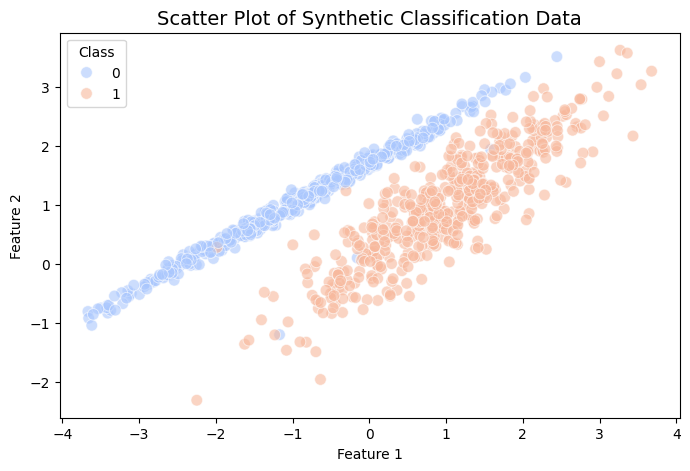

In [4]:
# 📌 Converting X (NumPy array) into a pandas DataFrame
# Why convert? → Seaborn works smoothly with DataFrame column names.
# We give readable names to columns instead of default index numbers.
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])

# 📌 Adding class labels (y) as a new column in the DataFrame
# This helps seaborn pick the class automatically from the DataFrame.
df["Class"] = y

# 📌 Plotting classification dataset using seaborn
# This creates a scatter plot where:
#   ✔ Each point = one sample
#   ✔ x-axis → Feature_1
#   ✔ y-axis → Feature_2
#   ✔ Color (hue) → Class label (0 vs 1)
# Points belonging to different classes will show in different colors.
plt.figure(figsize=(8, 5))  # Increase figure size for better clarity
sns.scatterplot(
    data=df,                   # Passing complete DataFrame
    x="Feature_1",             # Column for x-axis
    y="Feature_2",             # Column for y-axis
    hue="Class",               # Color-coding using class labels
    palette="coolwarm",        # Color style preference (optional, visually appealing)
    s=70,                       # Size of the points → easier to notice visually
    alpha=0.6                  # Transparency helps reveal overlapping points
)

# 📌 Adding title and axis labels for better readability
plt.title("Scatter Plot of Synthetic Classification Data", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 📌 Display plot
plt.show()

In [ ]:
# 📌 Importing the train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# train_test_split is a utility from scikit-learn that helps us split a dataset
# into two parts: a Training Set and a Test Set.
# This is one of the MOST important steps in machine learning because:
#   ✔ We want the model to learn from one portion of the data (training)
#   ✔ And then evaluate the model on completely unseen data (testing)
# Without a test split, we cannot measure how well the model generalizes.
from sklearn.model_selection import train_test_split


# 📌 Splitting the dataset into Training and Test datasets
# We pass the feature matrix X and the label vector y.
# The function randomly splits the rows of X and y in the same proportion
# (so each feature row still matches with its correct label after splitting).
X_train, X_test, y_train, y_test = train_test_split(
    X,                 # X → all features (input variables). Shape: (n_samples, n_features)
    y,                 # y → all labels (target values). Shape: (n_samples,)

    test_size=0.25,    # 25% of the data will be used for TESTING.
                       # The remaining 75% (1 - 0.25) will be used for TRAINING.
                       # Why 75/25 split?
                       #   ✔ Training set must be large enough for model to learn patterns
                       #   ✔ Test set must also be large enough to judge performance fairly

    random_state=42    # Determines how data is shuffled before the split.
                       # Keeping a fixed seed (like 42) makes the split REPRODUCIBLE:
                       #   - Every time you run the code, the same samples go to train/test.
                       # If we change random_state, the specific samples in train/test change.
)

# 📌 What we get after splitting:
#  X_train → Training features    (used to teach the model)
#  X_test  → Testing features     (used to evaluate the model on unseen data)
#  y_train → Training labels
#  y_test  → Testing labels

# If our original dataset has 1000 samples:
#   test_size=0.25 → 250 samples go to test set
#   remaining 750 → training set
#
# So expected shapes would be:
#   X_train → (750, 2)
#   X_test  → (250, 2)
#   y_train → (750,)
#   y_test  → (250,)
#
# 📌 Why splitting correctly is extremely important in ML
# If we train the model on ALL data and then TEST on the SAME data:
#   - The model already "saw" the answers during training
#   - Accuracy becomes artificially high
#   - This is called OVERFITTING
#
# By testing on X_test (completely unseen data):
#   ✔ We measure REAL generalization ability
#   ✔ We know how the model will perform on real-world unseen data


In [7]:
# 📌 Importing the SVC (Support Vector Classifier) model
# SVC is a classification algorithm from the Support Vector Machine (SVM) family.
# SVMs are powerful models commonly used for:
#   ✔ Binary classification
#   ✔ Finding the best decision boundary between two classes
#   ✔ Handling high-dimensional data
#
# SVC tries to find the HYPERPLANE (a separation line in 2D, plane in 3D, etc.)
# that maximizes the margin — i.e., the distance between the separating line and
# the nearest data points from both classes.
from sklearn.svm import SVC


# 📌 Creating an SVM classification model
svc = SVC(kernel='linear')
# Here we specify "kernel='linear'" which means:
#   ✔ We are asking SVM to draw a *straight line* (linear decision boundary)
#   ✔ This works well when the classes can be separated linearly
#
# If the classes were NOT linearly separable, we might use:
#   kernel='rbf'  → non-linear curved boundary
#   kernel='poly' → polynomial decision boundary
#
# But for this dataset, a linear kernel is well suited because
# the two clusters are almost linearly separable.


# 📌 Training (fitting) the SVM model
svc.fit(X_train, y_train)
# The model now learns from the TRAINING DATA only.
# During training, SVM:
#   🔹 Looks at all training samples (X_train)
#   🔹 Checks corresponding labels (y_train)
#   🔹 Calculates the best separating decision boundary
#   🔹 Maximizes the margin between the two classes
#
# After training:
#   - The model has “learned” the pattern in the data
#   - It is ready to predict the class of NEW, unseen data points (like X_test)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
# 📌 Making predictions using the trained SVM model
# After training on X_train and y_train, the SVM model has now learned the pattern
# and the best separating decision boundary between the two classes.
# Now we pass the TEST FEATURES (X_test) to the model to predict their class labels.

y_pred = svc.predict(X_test)

# 🔍 What happens internally during prediction:
#   ✔ The model takes each sample in X_test (unseen data during training)
#   ✔ For each sample, it checks on which side of the decision boundary it lies
#   ✔ Based on that, it assigns the predicted label (0 or 1)
#
# y_pred will be a 1-dimensional array containing predicted class labels
# of the same length as y_test.
#
# Example:
# If X_test has 250 samples, then y_pred will also contain 250 values.
#     y_pred → [1, 0, 0, 1, 1, 0, 1, ...]
#
# IMPORTANT LEARNING POINT:
#   The model NEVER sees y_test before prediction.
#   This ensures it makes predictions only based on the patterns it learned
#   from the training dataset — NOT memorization.
#
# Next step:
#   We compare y_pred (predicted labels) with y_test (actual true labels)
#   to measure how well the SVM classifier performed.


In [9]:
# 📌 Step 1: Import evaluation metrics from scikit-learn
# These are standard tools used to measure how good a classification model is.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ✅ 1) Accuracy Score
# accuracy_score compares:
#   - y_test  → TRUE labels (actual ground truth)
#   - y_pred  → PREDICTED labels (from the model)
#
# It calculates:
#   Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
accuracy = accuracy_score(y_test, y_pred)

print("✅ Accuracy of the SVM model:", accuracy)
# If accuracy is close to 1.0 (or 100%), the model is doing very well.
# But accuracy alone is not always enough (especially for imbalanced classes),
# so we also look at confusion matrix and classification report.


# 🔢 2) Confusion Matrix
# confusion_matrix tells us EXACTLY how the model is performing per class.
# For BINARY CLASSIFICATION (labels 0 and 1), the confusion matrix looks like:
#
#                Predicted 0      Predicted 1
# Actual 0      [   TN        ,     FP     ]
# Actual 1      [   FN        ,     TP     ]
#
# TN → True Negatives → correctly predicted 0s
# FP → False Positives → actual 0 but predicted 1 (type of error)
# FN → False Negatives → actual 1 but predicted 0 (type of error)
# TP → True Positives → correctly predicted 1s
cm = confusion_matrix(y_test, y_pred)

print("\n🔢 Confusion Matrix:")
print(cm)

# Optional: You can make the confusion matrix more readable like this:
# import pandas as pd
# cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# print(cm_df)


# 📊 3) Classification Report
# classification_report gives a detailed breakdown per class:
#   - precision
#   - recall
#   - f1-score
#   - support (number of samples of that class in y_test)
#
# For each class (0 and 1):
#   ✔ Precision → Of all points predicted as class X, how many were actually X?
#   ✔ Recall    → Of all actual points of class X, how many did we correctly predict?
#   ✔ F1-score  → Harmonic mean of precision and recall (balances both)
#
# It also provides:
#   - macro avg  → unweighted mean of metrics over all classes
#   - weighted avg → mean of metrics weighted by support (class frequencies)
report = classification_report(y_test, y_pred)

print("\n📊 Classification Report:")
print(report)


✅ Accuracy of the SVM model: 0.992

🔢 Confusion Matrix:
[[132   2]
 [  0 116]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       134
           1       0.98      1.00      0.99       116

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



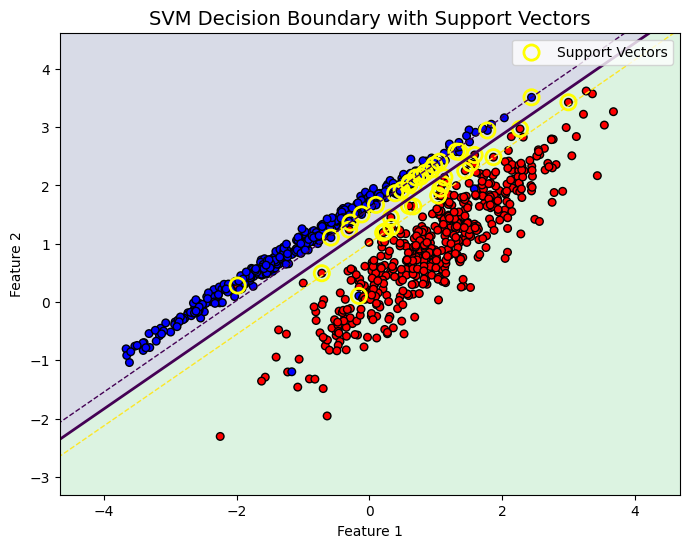

In [10]:
# Combine train and test for a full view (optional, just for nicer plot)
X_all = np.vstack((X_train, X_test))
y_all = np.hstack((y_train, y_test))

# 📌 Step 1: Create a mesh/grid over the feature space
# This grid will be used to evaluate the model at many (x1, x2) positions
# so that we can draw the decision boundary and margins.
x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1

# Create a grid of points with small step size for smooth boundary
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# 📌 Step 2: Evaluate the SVM decision function on the grid
# svc.decision_function returns:
#   > 0 → one side of the boundary (e.g., class 1)
#   < 0 → the other side (e.g., class 0)
#   = 0 → exactly on the decision boundary
grid_points = np.c_[xx.ravel(), yy.ravel()]   # shape: (300*300, 2)
Z = svc.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 📌 Step 3: Plot decision boundary and margins
plt.figure(figsize=(8, 6))

# Filled contour: shows regions classified as class 0 or class 1
plt.contourf(
    xx, yy, Z,
    levels=[Z.min(), 0, Z.max()],   # two regions: below 0, above 0
    alpha=0.2
)

# Contour lines:
#   level 0  → decision boundary
#   level -1 → margin line for one class
#   level +1 → margin line for other class
plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles='solid')    # main boundary
plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, linestyles='dashed')  # margins


# 📌 Step 4: Plot all data points (both classes)
# We'll color them by their TRUE labels (y_all).
scatter = plt.scatter(
    X_all[:, 0], X_all[:, 1],
    c=y_all,              # color depends on class label (0/1)
    cmap='bwr',           # blue-red colormap
    s=30,
    edgecolors='k'
)

# 📌 Step 5: Highlight support vectors
# SVM identifies a subset of points called support vectors that lie closest
# to the decision boundary and define its position.
# They are accessible via svc.support_vectors_
plt.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s=120,                # larger size to stand out
    facecolors='none',    # hollow circles
    edgecolors='yellow',  # yellow edge to highlight
    linewidths=2,
    label='Support Vectors'
)

plt.title("SVM Decision Boundary with Support Vectors", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


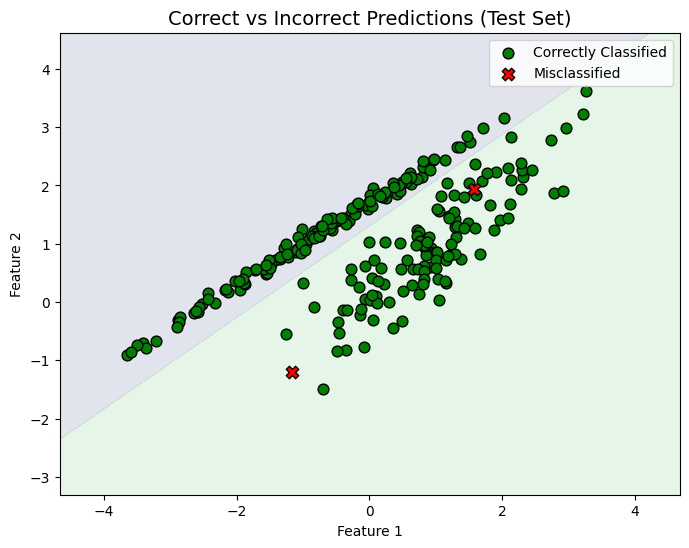

In [11]:
# 📌 Identify correct and incorrect predictions on the TEST set
correct_mask = (y_pred == y_test)      # True where prediction is correct
incorrect_mask = (y_pred != y_test)    # True where prediction is wrong

plt.figure(figsize=(8, 6))

# Plot decision background again (optional, but nice to see)
plt.contourf(
    xx, yy, Z,
    levels=[Z.min(), 0, Z.max()],
    alpha=0.15
)

# ✅ Correctly classified points (green)
plt.scatter(
    X_test[correct_mask, 0],
    X_test[correct_mask, 1],
    c='green',
    marker='o',
    s=60,
    edgecolors='k',
    label='Correctly Classified'
)

# ❌ Incorrectly classified points (red X)
plt.scatter(
    X_test[incorrect_mask, 0],
    X_test[incorrect_mask, 1],
    c='red',
    marker='X',
    s=80,
    edgecolors='k',
    label='Misclassified'
)

plt.title("Correct vs Incorrect Predictions (Test Set)", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 🔥 End-to-End Summary: SVM Classification on Synthetic Dataset

### 📌 Step 1 — Creating a Synthetic Classification Dataset
We generated a synthetic (artificial) dataset using `make_classification()` from scikit-learn.  
This allowed us to practice Machine Learning even without real-world data, while still controlling:
- Number of samples
- Number of features
- Number of classes
- Cluster structure and separability

The function returned:
- `X` → Feature matrix of shape `(n_samples, n_features)`
- `y` → Class labels of shape `(n_samples,)`

Because we set `n_features=2`, we can conveniently visualize the dataset in a 2D scatter plot.

---

### 📌 Step 2 — Splitting the Dataset into Training and Testing Sets
We used `train_test_split()` to divide the dataset:

| Set | Purpose |
|-----|---------|
| **Training Set (75%)** | Teaches the machine learning model |
| **Test Set (25%)** | Evaluates generalization on new, unseen data |

Using `random_state=42` ensures **reproducible splitting** — so the same data goes to training/testing every time the code runs.

---

### 📌 Step 3 — Training the SVM Classification Model
We created an SVM classifier using:

```python
svc = SVC(kernel='linear')
```

- `kernel='linear'` instructs SVM to draw a **straight-line decision boundary**
- SVM learns by **finding the hyperplane that maximizes the margin** between the two classes
- Only the **support vectors** (critical boundary points) influence this hyperplane

The model was trained using:
```python
svc.fit(X_train, y_train)
```

---

### 📌 Step 4 — Making Predictions on the Test Set
We fed **unseen test features** to the model:

```python
y_pred = svc.predict(X_test)
```

The model predicts class labels for each test point based on which side of the decision boundary it lies.

---

### 📌 Step 5 — Model Evaluation
We used:
- **Accuracy Score** → Percentage of correct predictions  
- **Confusion Matrix** → Breakdown of TP, TN, FP, FN per class  
- **Classification Report** → Precision, Recall, and F1-score for each class  

These metrics reveal how well the model performs on real unseen data and whether any class is harder to classify.

---

### 📌 Step 6 — Visual Analysis of the Model
We visualized three important SVM elements:

#### ✔ Decision Boundary + Margins
- Solid line → Main separation boundary
- Dashed lines → Margins (distance SVM maximizes)

#### ✔ Support Vectors
- Hollow highlighted points
- Points closest to the decision boundary that determine its position

#### ✔ Correct vs Incorrect Classifications (Test Set)
- 🟢 Green circles → Correct predictions
- 🔴 Red "X" marks → Misclassified samples

This visualization helps us understand:
- Where the model performs strongly
- Where it struggles (usually near the boundary)
- How SVM uses margin maximization to separate classes

---

### 🚀 Final Takeaway
This complete workflow covers the *full machine learning pipeline*:
1. Data generation  
2. Train-test splitting  
3. Model training  
4. Prediction  
5. Evaluation  
6. Visualization and interpretation  

This experiment builds a strong foundation for understanding **Support Vector Machines** and provides a reference for evaluating ML models accurately — both numerically and visually.



In [14]:
# 📌 Importing the make_classification function
# make_classification is a helper function in scikit-learn used to generate synthetic
# datasets specifically for classification machine learning problems.
# It helps when:
#   ✔ We want to practice ML but don't have real-world data
#   ✔ We want to test how a model behaves with easy / hard / noisy datasets
#   ✔ We want full control over dataset structure (size, difficulty, separability)
from sklearn.datasets import make_classification


# 📌 Creating synthetic (fake) classification dataset
# make_classification returns:
#   🔹 X → Features (independent variables) — a NumPy array of shape (n_samples × n_features)
#   🔹 y → Labels / Target values — a NumPy array of shape (n_samples,)
#
# Let's break down each parameter used below 👇
X, y = make_classification(
    n_samples=1000,       # Total number of samples (data points).
                          # So X has 1000 rows and y has 1000 labels.

    n_features=2,         # Number of features (input variables).
                          # With 2 features per sample (x1, x2), the dataset can be plotted in 2D.

    n_classes=2,          # Number of output classes → binary classification (0 and 1).

    n_clusters_per_class=2,  # Number of sub-clusters inside each class.
                             # 1 → means each class will be a single tight cluster.
                             # 2 → means each class is spread across two different clusters.
                             # This makes the dataset more challenging and realistic,
                             # because class boundaries are less straightforward.

    n_redundant=0,        # Number of redundant (duplicate or correlated) features.
                          # 0 → means both features are informative and useful for classification.

    random_state=15       # Fixing random state ensures dataset reproducibility.
                          # Changing this number changes the arrangement of generated points.
)

# After execution:
# X → shape (1000, 2)  → 1000 rows × 2 feature columns (numeric values)
# y → shape (1000,)    → 1000 labels (0 or 1)
#
# Example:
#    X[0] might look like  [-1.12, 0.88]
#    y[0] might be 0 or 1
#
# This synthetic dataset is now ready to be used for:
#   ✔ Data visualization
#   ✔ Training ML models (Logistic Regression, SVM, KNN, etc.)
#   ✔ Understanding decision boundaries and class separability


In [ ]:
# 📌 Importing the train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
# train_test_split is a utility from scikit-learn that helps us split a dataset
# into two parts: a Training Set and a Test Set.
# This is one of the MOST important steps in machine learning because:
#   ✔ We want the model to learn from one portion of the data (training)
#   ✔ And then evaluate the model on completely unseen data (testing)
# Without a test split, we cannot measure how well the model generalizes.
from sklearn.model_selection import train_test_split


# 📌 Splitting the dataset into Training and Test datasets
# We pass the feature matrix X and the label vector y.
# The function randomly splits the rows of X and y in the same proportion
# (so each feature row still matches with its correct label after splitting).
X_train, X_test, y_train, y_test = train_test_split(
    X,                 # X → all features (input variables). Shape: (n_samples, n_features)
    y,                 # y → all labels (target values). Shape: (n_samples,)

    test_size=0.25,    # 25% of the data will be used for TESTING.
                       # The remaining 75% (1 - 0.25) will be used for TRAINING.
                       # Why 75/25 split?
                       #   ✔ Training set must be large enough for model to learn patterns
                       #   ✔ Test set must also be large enough to judge performance fairly

    random_state=42    # Determines how data is shuffled before the split.
                       # Keeping a fixed seed (like 42) makes the split REPRODUCIBLE:
                       #   - Every time you run the code, the same samples go to train/test.
                       # If we change random_state, the specific samples in train/test change.
)

# 📌 What we get after splitting:
#  X_train → Training features    (used to teach the model)
#  X_test  → Testing features     (used to evaluate the model on unseen data)
#  y_train → Training labels
#  y_test  → Testing labels

# If our original dataset has 1000 samples:
#   test_size=0.25 → 250 samples go to test set
#   remaining 750 → training set
#
# So expected shapes would be:
#   X_train → (750, 2)
#   X_test  → (250, 2)
#   y_train → (750,)
#   y_test  → (250,)
#
# 📌 Why splitting correctly is extremely important in ML
# If we train the model on ALL data and then TEST on the SAME data:
#   - The model already "saw" the answers during training
#   - Accuracy becomes artificially high
#   - This is called OVERFITTING
#
# By testing on X_test (completely unseen data):
#   ✔ We measure REAL generalization ability
#   ✔ We know how the model will perform on real-world unseen data


In [15]:
# 📌 Importing the SVC (Support Vector Classifier) model
# SVC is a classifier from the Support Vector Machine (SVM) family.
# SVMs are widely used for:
#   ✔ Binary and multi-class classification
#   ✔ Finding strong decision boundaries between classes
#   ✔ Handling both linearly and non-linearly separable datasets
#
# SVM works by trying to find a *decision boundary* (hyperplane) that best separates classes
# while MAXIMIZING the MARGIN (distance between the boundary and the nearest points).
from sklearn.svm import SVC


# 📌 Creating an SVM classification model using the RBF kernel
svc = SVC(kernel='rbf')
# kernel='rbf' stands for **Radial Basis Function kernel** — a NON-LINEAR kernel.
#
# 🧠 Why choose RBF?
#   ✔ When the dataset cannot be separated by a straight line (non-linear pattern)
#   ✔ When classes are mixed or form curves/clusters that a linear line cannot split
#
# Visual intuition:
#   🡆 Linear Kernel: draws a straight separation line
#   🡆 RBF Kernel: draws a flexible/curved separation boundary by mapping data
#      into a higher-dimensional space using the kernel trick.
#
# Other kernels for reference:
#   kernel='linear'  → straight boundary (best for linearly separable data)
#   kernel='poly'    → polynomial curves (degree can be tuned)
#   kernel='sigmoid' → neural-network-like decision boundary (rarely best)
#
# In our case:
#   We chose RBF because the dataset contains multiple clusters per class
#   (n_clusters_per_class = 2), meaning the classes aren't cleanly separable by a line.
#   So a non-linear decision boundary is more suitable.


# 📌 Training (fitting) the SVM model
svc.fit(X_train, y_train)
# During training, SVM:
#   🔹 Reads all training samples (X_train)
#   🔹 Looks at the true labels (y_train)
#   🔹 Determines which points are "support vectors" (closest to the boundary)
#   🔹 Builds a decision boundary that best separates the two classes
#   🔹 Applies the kernel trick to allow non-linear separation in higher dimension
#
# After training:
#   ✔ The model has learned patterns in the dataset
#   ✔ It is ready to classify NEW unseen data (X_test)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
# 📌 Making predictions using the trained SVM model
# After training on X_train and y_train, the SVM model has learned the underlying pattern
# and constructed a decision boundary that separates the classes.
# Now, we pass the TEST FEATURES (X_test) to the model to generate predictions.

y_pred = svc.predict(X_test)

# 🔍 What happens internally during prediction:
#   ✔ The model processes each data point in X_test (never seen during training)
#   ✔ For each point, the SVM evaluates its position relative to the learned decision boundary
#   ✔ With the RBF kernel, the model maps the point into a higher-dimensional space
#     to determine on which side of the curved decision boundary it lies
#   ✔ Based on this, the model assigns the predicted class label: 0 or 1
#
# y_pred will be a 1D NumPy array containing the predicted labels
# and will always have the SAME number of elements as y_test.
#
# Example:
# If X_test contains 250 samples, then y_pred also contains 250 predicted labels:
#     y_pred → [1, 0, 0, 1, 1, 0, 1, ...]
#
# ⚠ IMPORTANT LEARNING POINT:
#   The model NEVER sees y_test during training.
#   During prediction, it does not "compare" with actual labels.
#   It only uses the patterns it learned from X_train and y_train to make decisions.
#   This ensures the model generalizes rather than memorizes.
#
# 🔜 Next step:
#   We evaluate the model by comparing:
#     y_pred → predicted labels
#     y_test → true labels
#   using accuracy, confusion matrix, and classification report.


In [19]:
# 📌 Step 1: Import evaluation metrics from scikit-learn
# These are standard tools used to measure how good a classification model is.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ✅ 1) Accuracy Score
# accuracy_score compares:
#   - y_test  → TRUE labels (actual ground truth)
#   - y_pred  → PREDICTED labels (from the model)
#
# It calculates:
#   Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
accuracy = accuracy_score(y_test, y_pred)

print("✅ Accuracy of the SVM model:", accuracy)
# If accuracy is close to 1.0 (or 100%), the model is doing very well on this test set.
# However:
#   ⚠ Accuracy alone can be misleading when classes are imbalanced
#      (e.g., 95% of data is class 0 and only 5% is class 1).
#   👉 That’s why we also look at the confusion matrix and classification report.


# 🔢 2) Confusion Matrix
# confusion_matrix tells us EXACTLY how the model is performing per class.
# For BINARY CLASSIFICATION (labels 0 and 1), and when the default label ordering is [0, 1],
# the confusion matrix is structured as:
#
#                Predicted 0      Predicted 1
# Actual 0      [   TN        ,     FP     ]
# Actual 1      [   FN        ,     TP     ]
#
# TN → True Negatives → correctly predicted 0s
# FP → False Positives → actual 0 but predicted 1 (model raised a "false alarm")
# FN → False Negatives → actual 1 but predicted 0 (model missed a positive case)
# TP → True Positives → correctly predicted 1s
cm = confusion_matrix(y_test, y_pred)

print("\n🔢 Confusion Matrix:")
print(cm)

# Optional: Make the confusion matrix more readable using pandas:
cm_df = pd.DataFrame(
     cm,
     index=["Actual 0", "Actual 1"],
     columns=["Predicted 0", "Predicted 1"]
)
print("\nConfusion Matrix (labeled):")
print(cm_df)


# 📊 3) Classification Report
# classification_report gives a detailed breakdown per class:
#   - precision
#   - recall
#   - f1-score
#   - support (number of samples of that class in y_test)
#
# For each class (0 and 1):
#   ✔ Precision (for class X):
#        Of all points the model predicted as class X,
#        how many were actually class X?
#
#   ✔ Recall (for class X):
#        Of all actual points that truly belong to class X,
#        how many did the model correctly identify as class X?
#
#   ✔ F1-score:
#        Harmonic mean of precision and recall.
#        Useful when you want a single metric that balances both.
#
# It also provides:
#   - macro avg:
#       Simple (unweighted) average of metrics over all classes.
#       Treats all classes equally, regardless of how many samples they have.
#
#   - weighted avg:
#       Average of metrics weighted by the number of samples in each class.
#       More influenced by performance on majority classes.
report = classification_report(y_test, y_pred)

print("\n📊 Classification Report:")
print(report)


✅ Accuracy of the SVM model: 0.94

🔢 Confusion Matrix:
[[115   1]
 [ 14 120]]

Confusion Matrix (labeled):
          Predicted 0  Predicted 1
Actual 0          115            1
Actual 1           14          120

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       116
           1       0.99      0.90      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250



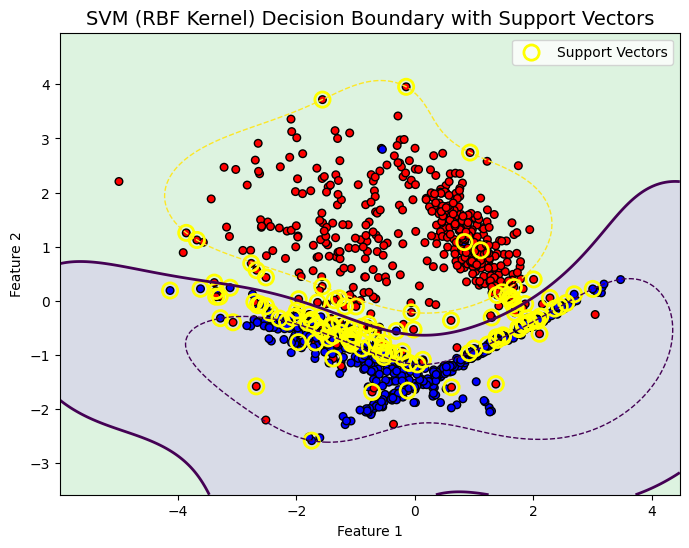

In [20]:
# ✅ Combine train and test for a full view (optional, just for nicer plot)
# This lets us visualize ALL points (both training and test) on the same graph.
X_all = np.vstack((X_train, X_test))
y_all = np.hstack((y_train, y_test))

# 📌 Step 1: Create a mesh/grid over the feature space
# We create a dense grid of (x1, x2) points that cover the entire range of our data.
# For each point on this grid, we will ask the trained SVM:
#   "On which side of your decision boundary does this point lie?"
x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1

# Create a grid of coordinates with a fine resolution (300 x 300 points)
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# 📌 Step 2: Evaluate the SVM decision function on the grid
# We reshape the grid into a list of points of shape (N, 2), where N = 300 * 300.
grid_points = np.c_[xx.ravel(), yy.ravel()]   # Each row is [x1, x2]

# svc.decision_function() gives a real-valued score for each point:
#   > 0 → one side of the boundary (typically class 1)
#   < 0 → the other side (typically class 0)
#   = 0 → exactly on the decision boundary
# For RBF SVM, this boundary is generally CURVED, not a straight line.
Z = svc.decision_function(grid_points)
Z = Z.reshape(xx.shape)  # Reshape back to 2D grid for contour plotting


# 📌 Step 3: Plot decision boundary and margins
plt.figure(figsize=(8, 6))

# 🎨 Background regions:
# We use a filled contour plot to shade the two class regions.
# levels=[Z.min(), 0, Z.max()] splits the space into:
#   - One region where Z < 0
#   - One region where Z > 0
plt.contourf(
    xx, yy, Z,
    levels=[Z.min(), 0, Z.max()],
    alpha=0.2
)

# 🧵 Contour lines:
#   level = 0   → main decision boundary (where the classifier is undecided)
#   levels = -1, 1 → approximate margin lines (distance from boundary)
# Note: With soft-margin and RBF kernel, margins are not as "clean" as in hard-margin linear SVM,
# but these still give a good visual sense of margin regions.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles='solid')       # main boundary
plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, linestyles='dashed')  # margin "bands"


# 📌 Step 4: Plot all data points (both classes)
# Points are colored based on their TRUE labels (y_all).
scatter = plt.scatter(
    X_all[:, 0], X_all[:, 1],
    c=y_all,              # color depends on class (0 or 1)
    cmap='bwr',           # blue-red colormap
    s=30,
    edgecolors='k'        # black border for better visibility
)

# 📌 Step 5: Highlight support vectors
# SVM identifies some critical points called "support vectors":
#   - They are typically close to the decision boundary
#   - They strongly influence where the boundary is placed
# We highlight them with larger, hollow yellow circles.
plt.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s=120,                # make them larger
    facecolors='none',    # hollow markers
    edgecolors='yellow',  # yellow outline
    linewidths=2,
    label='Support Vectors'
)

# 📌 Final plot decorations
plt.title("SVM (RBF Kernel) Decision Boundary with Support Vectors", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


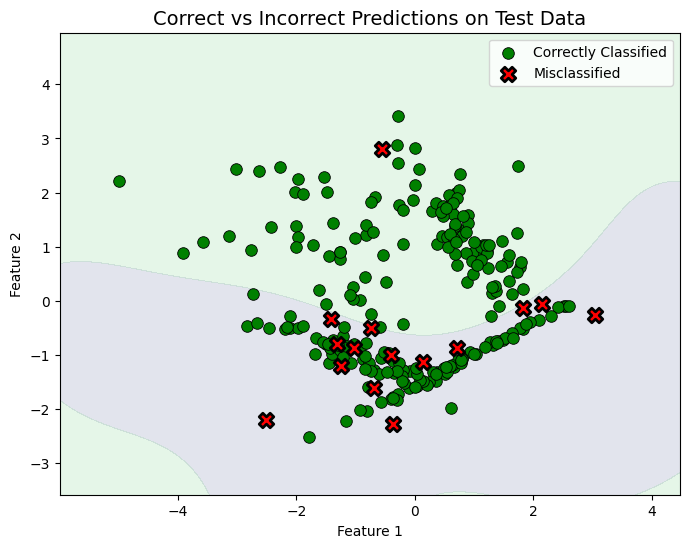

In [21]:
# 📌 Identify correct and incorrect predictions on the TEST set
# correct_mask → True for samples where prediction matches actual label
# incorrect_mask → True for samples where prediction is wrong
correct_mask = (y_pred == y_test)
incorrect_mask = (y_pred != y_test)

plt.figure(figsize=(8, 6))

# 📌 Plot decision background again (light shading showing class regions)
# This helps visualize whether errors occur near the decision boundary.
plt.contourf(
    xx, yy, Z,
    levels=[Z.min(), 0, Z.max()],   # split into two regions: Z < 0 (class 0) and Z > 0 (class 1)
    alpha=0.15
)

# 🟢 Correctly classified points
# If the model predicted correctly, plot them as GREEN circles
plt.scatter(
    X_test[correct_mask, 0],
    X_test[correct_mask, 1],
    c='green',
    marker='o',
    s=70,
    edgecolors='black',
    linewidths=0.6,
    label='Correctly Classified'
)

# 🔴 Incorrectly classified points
# If the model predicted incorrectly, plot them as RED X markers
plt.scatter(
    X_test[incorrect_mask, 0],
    X_test[incorrect_mask, 1],
    c='red',
    marker='X',
    s=110,
    linewidths=2,
    edgecolors='black',
    label='Misclassified'
)

# 📌 Final plot formatting
plt.title("Correct vs Incorrect Predictions on Test Data", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [22]:
# 📌 Importing the SVC (Support Vector Classifier) model
# SVC is a classifier from the Support Vector Machine (SVM) family.
# SVMs are widely used for:
#   ✔ Binary and multi-class classification
#   ✔ Finding strong decision boundaries between classes
#   ✔ Handling both linearly and non-linearly separable datasets
#
# SVM works by trying to find a *decision boundary* (hyperplane) that best separates classes
# while MAXIMIZING the MARGIN (distance between the boundary and the nearest support vectors).
from sklearn.svm import SVC


# 📌 Creating an SVM classification model using the POLYNOMIAL kernel
svc = SVC(kernel='poly')
# kernel='poly' instructs SVM to learn a **polynomial decision boundary**.
#
# Polynomial kernel creates boundaries such as:
#   ✔ Parabolas
#   ✔ Cubic curves
#   ✔ More complex polynomial shapes depending on the degree
#
# 🧠 When to use Polynomial Kernel:
#   ✔ When the classes have a structured but non-linear separation
#   ✔ When clusters follow a curved pattern instead of random RBF-like shapes
#
# Visual intuition:
#   🡆 Linear Kernel      → straight line boundary
#   🡆 Polynomial Kernel  → curved boundary with polynomial bends
#   🡆 RBF Kernel         → highly flexible boundary wrapping around clusters
#
# Additional parameter (optional):
#   degree (default = 3)
#   A higher degree → more complex boundary but higher risk of overfitting.
#   Example: SVC(kernel='poly', degree=5)
#
# ⚠ Important note:
# Polynomial kernels can become computationally expensive on large datasets —
# unlike RBF which scales better in practice.


# 📌 Training (fitting) the SVM model
svc.fit(X_train, y_train)
# During training, SVM:
#   🔹 Reads all training samples (X_train)
#   🔹 Looks at the true class labels (y_train)
#   🔹 Identifies support vectors (critical boundary points)
#   🔹 Builds a polynomial decision boundary that maximizes classification separation
#   🔹 Applies the kernel trick → mapping data to higher-dimensional space
#
# After training:
#   ✔ The model has learned patterns in the dataset
#   ✔ It is ready to classify NEW unseen data (X_test)


,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
# 📌 Making predictions using the Polynomial SVM model
# After training, the model now applies the learned polynomial decision boundary
# to classify unseen samples in X_test.
y_pred = svc.predict(X_test)

# 🔍 Internally:
#   ✔ The model maps X_test into a higher-dimensional space using a polynomial transformation
#   ✔ Based on the side of the polynomial decision boundary, it assigns class 0 or 1
#
# y_pred will be a NumPy array of predicted labels (same length as y_test)


# 📌 Import evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1️⃣ Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("📌 Accuracy of Polynomial SVM:", accuracy)

# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔹 Confusion Matrix:")
print(cm)

# 3️⃣ Classification Report
report = classification_report(y_test, y_pred)
print("\n📊 Classification Report:")
print(report)


📌 Accuracy of Polynomial SVM: 0.936

🔹 Confusion Matrix:
[[114   2]
 [ 14 120]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       116
           1       0.98      0.90      0.94       134

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



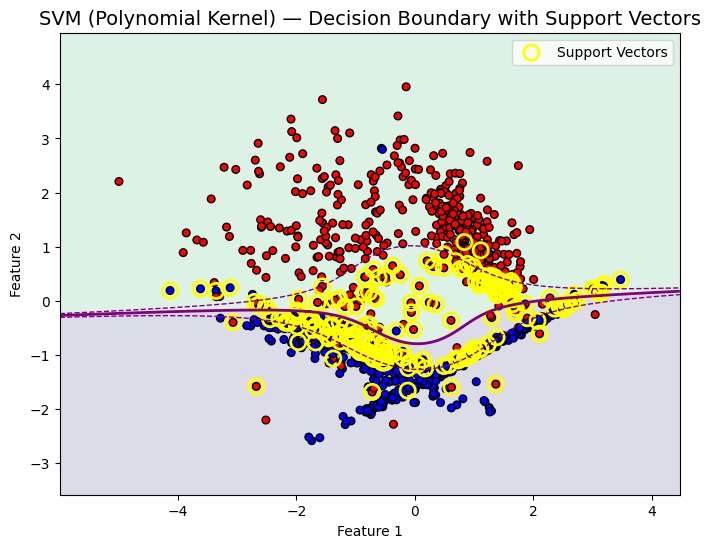

In [24]:
# 🔁 Combine train + test for full visualization
X_all = np.vstack((X_train, X_test))
y_all = np.hstack((y_train, y_test))

# 📌 Create a grid over the feature space (for plotting decision contours)
x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Evaluate decision function on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = svc.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 📌 Plot decision boundary + margins
plt.figure(figsize=(8, 6))

# Background shading
plt.contourf(
    xx, yy, Z,
    levels=[Z.min(), 0, Z.max()],
    alpha=0.18
)

# Decision boundary (level = 0) & margins (levels = -1, +1)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="purple")     # Main boundary
plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, linestyles="--", colors="purple")  # Margins

# 📌 Plot all data points
plt.scatter(
    X_all[:, 0], X_all[:, 1],
    c=y_all,
    cmap="bwr",
    s=30,
    edgecolors="k"
)

# 📌 Highlight support vectors
plt.scatter(
    svc.support_vectors_[:, 0],
    svc.support_vectors_[:, 1],
    s=120,
    facecolors="none",
    edgecolors="yellow",
    linewidths=2,
    label="Support Vectors"
)

plt.title("SVM (Polynomial Kernel) — Decision Boundary with Support Vectors", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


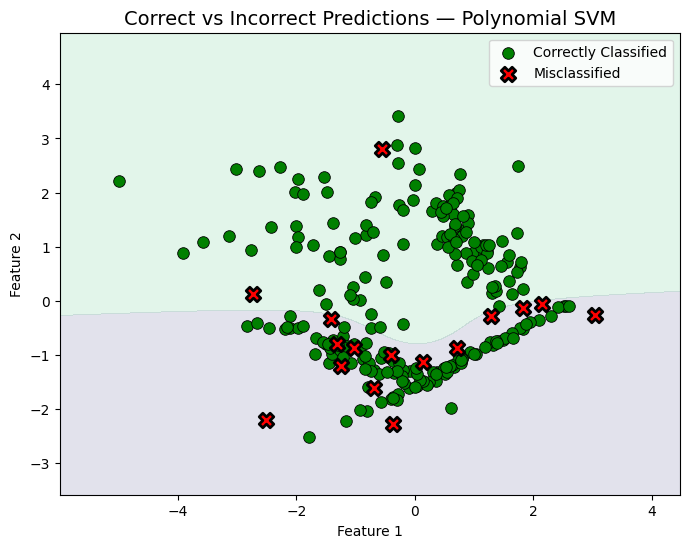

In [25]:
# 📌 Identify correct and incorrect predictions on the TEST set
correct_mask = (y_pred == y_test)      # True where prediction matches the true label
incorrect_mask = (y_pred != y_test)    # True where prediction is wrong

plt.figure(figsize=(8, 6))

# 🎨 Decision background (light class regions)
plt.contourf(
    xx, yy, Z,
    levels=[Z.min(), 0, Z.max()],      # Z < 0 for class 0 region, Z > 0 for class 1 region
    alpha=0.15
)

# 🟢 Correct predictions → Green circles
plt.scatter(
    X_test[correct_mask, 0],
    X_test[correct_mask, 1],
    c="green",
    marker="o",
    s=70,
    edgecolors="black",
    linewidths=0.6,
    label="Correctly Classified"
)

# 🔴 Incorrect predictions → Red 'X'
plt.scatter(
    X_test[incorrect_mask, 0],
    X_test[incorrect_mask, 1],
    c="red",
    marker="X",
    s=110,
    linewidths=2,
    edgecolors="black",
    label="Misclassified"
)

# 🔧 Final styling
plt.title("Correct vs Incorrect Predictions — Polynomial SVM", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


## 🔥 End-to-End Summary: SVM Classification with RBF & Polynomial Kernels

This notebook explored the **complete ML pipeline** using **Support Vector Machines (SVM)** on synthetic 2-feature dataset — covering model training, evaluation, and visualization for **RBF** and **Polynomial kernels**.

---

## 📌 Step 1 — Dataset Creation
Synthetic dataset generated using `make_classification()` with:
- 1000 samples  
- 2 numerical features  
- 2 classes  
- `n_clusters_per_class = 2` → non-linear, multi-cluster separation  

Purpose of synthetic dataset:
- practice ML without real-world data
- full control of complexity
- ideal 2-D visualization of boundaries

---

## 📌 Step 2 — Train/Test Split
Dataset divided using `train_test_split()`:
- 75% → training
- 25% → testing
- `random_state = 42` → reproducible split

Ensures:
- model learns patterns only from training
- test set evaluates generalization

---

## 📌 Step 3 — SVM Model Training

### 🔹 A) RBF Kernel SVM
``` python
svc = SVC(kernel='rbf')
```
- Creates **highly flexible curved boundaries**
- Great for **irregular, overlapping clusters**
- Adapts locally around cluster shapes

### 🔹 B) Polynomial Kernel SVM
``` python
svc = SVC(kernel='poly')
```
- Creates **smooth polynomial-shaped boundaries**
- Degree determines curve complexity (`degree=3` default)
- Useful when separation follows a curved trend

Both models trained using:
``` python
svc.fit(X_train, y_train)
```

---

## 📌 Step 4 — Prediction
Both kernels prediction:
``` python
y_pred = svc.predict(X_test)
```
Important:
- model does NOT see `y_test` during prediction → prevents memorization
- prediction is based only on learned decision function

---

## 📌 Step 5 — Evaluation Metrics
Metrics used:
- Accuracy
- Confusion Matrix
- Classification Report (Precision, Recall, F1-score)

Insights:
- Accuracy gives overall correctness
- Confusion Matrix exposes exact error types per class
- F1-score balances precision & recall → key for uneven class sizes

---

## 📌 Step 6 — Decision Boundary Visualization
Visualized for both kernels:
- Colored classification regions
- Decision boundary (level = 0)
- Margins (levels = −1 and +1)
- Support vectors highlighted

🔍 Observations:
| Kernel | Boundary Style | Behavior |
|--------|----------------|----------|
| RBF | Highly flexible / warped | Wraps closely around clusters |
| Polynomial | Smooth geometric curves | Boundary complexity depends on degree |

---

## 📌 Step 7 — Correct vs Incorrect Test Predictions
Plotted test points:
- 🟢 Green circles → correct predictions
- 🔴 Red X → misclassifications

Interpretation:
- Errors near boundary → normal uncertainty region
- Errors deep inside a region → possible overfitting / underfitting / noisy samples

---

## 🧠 Final Takeaways
- Kernel choice drastically changes decision boundary
- RBF ≈ best default for most non-linear datasets
- Polynomial kernel ≈ good for structured curved patterns
- Visualization strengthens intuition about model behavior
- Support vectors are the key elements driving SVM decisions

---



In [ ]:
from sklearn.model_selection import GridSearchCV

# 📌 Step 1: Define the hyperparameter search space
# GridSearchCV will try every possible combination of these values
# and select the one that gives the highest model performance.

param_grid = {

    # 🔹 C (Regularization parameter)
    # Controls how strict the SVM is about misclassification during training.
    #   - Lower C  → allows more misclassifications → wider margin → prevents overfitting
    #   - Higher C → tries to classify every point correctly → narrow margin → risk of overfitting
    #
    # We try a wide scale of values to see which gives the best generalization.
    'C': [1, 10, 100, 1000],


    # 🔹 gamma (Kernel coefficient)
    # Defines how far the influence of a single training point reaches.
    # gamma is used in 'rbf', 'poly', and 'sigmoid' kernels.
    #   - High gamma  → decision boundary becomes very tight around points → overfitting risk
    #   - Low gamma   → smoother and more generalized decision boundary → risk of underfitting
    #
    # We explore multiple scales to find the best curvature of the boundary.
    'gamma': [1, 0.1, 0.01, 0.001],


    # 🔹 kernel (Type of decision boundary)
    # This decides the shape of the separating boundary the SVM will learn.
    #   'linear'  → straight-line boundary (fastest, best for linearly separable data)
    #   'rbf'     → most flexible curved boundary (usually best for nonlinear real-world datasets)
    #   'poly'    → polynomial-shaped boundary (degree determines complexity)
    #   'sigmoid' → rarely best; behaves like a neural network activation function
    #
    # Trying multiple kernels lets GridSearch find the best shape for the data.
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}


In [29]:
# 📌 Step 2: Setup GridSearchCV
# GridSearchCV will:
#   🔹 Train multiple SVM models using every combination of parameters in param_grid
#   🔹 Evaluate each model using cross-validation
#   🔹 Identify the best combination of hyperparameters based on the scoring metric
#   🔹 Retrain (refit) the final SVM model using the full training dataset

grid = GridSearchCV(
    estimator=SVC(),         # Base model → SVM classifier
    param_grid=param_grid,   # Dictionary of hyperparameters to search through
    cv=5,                    # 5-fold cross-validation → reduces overfitting & gives reliable evaluation
    scoring='accuracy',      # Metric used to compare models → accuracy in this case
    verbose=1,               # Level of logging:
                             #   0 → silent
                             #   1 → prints minimal output
                             #   2/3 → prints detailed progress for each parameter combination
    n_jobs=-1,               # Use ALL CPU cores → significantly speeds up the grid search
    refit=True               # After finding the best parameters:
                             #   ✔ Train a final model on the FULL training set
                             #   ✔ Allows direct use of grid.best_estimator_ for prediction later
)


# 📌 Step 3: Fit GridSearchCV on training data
# This step will train multiple SVM models using different hyperparameters
# and evaluate them using cross-validation.
grid.fit(X_train, y_train)

# 📌 Step 4: Extract the best combination of parameters
print("🎯 Best Hyperparameters found:", grid.best_params_)

# 📌 Step 5: Extract the best model (best estimator)
best_model = grid.best_estimator_
print("\n📌 Best SVM Model:", best_model)

# 📌 Step 6: Predict using the BEST model on the test set
y_pred = best_model.predict(X_test)

# 📌 Step 7: Evaluate the Best Model

# 1️⃣ Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n✅ Accuracy of Best SVM Model:", accuracy)

# 2️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🔢 Confusion Matrix:")
print(cm)

# 3️⃣ Classification Report
report = classification_report(y_test, y_pred)
print("\n📊 Classification Report:")
print(report)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
🎯 Best Hyperparameters found: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

📌 Best SVM Model: SVC(C=1000, gamma=0.1)

✅ Accuracy of Best SVM Model: 0.952

🔢 Confusion Matrix:
[[115   1]
 [ 11 123]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       116
           1       0.99      0.92      0.95       134

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.96      0.95      0.95       250



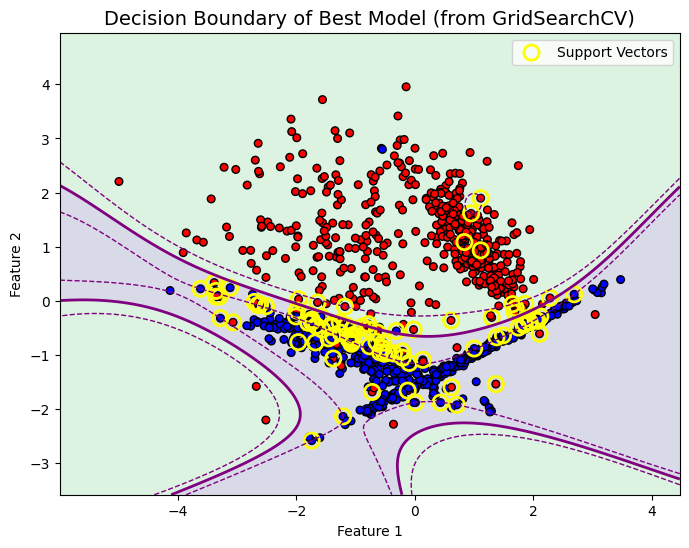

In [ ]:
# 🔁 Combine train + test for full visualization
X_all = np.vstack((X_train, X_test))
y_all = np.hstack((y_train, y_test))

# 📌 Create a grid of points covering the whole feature space
x_min, x_max = X_all[:, 0].min() - 1, X_all[:, 0].max() + 1
y_min, y_max = X_all[:, 1].min() - 1, X_all[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Evaluate the BEST SVM's decision function on the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
# decision_function() computes the distance of each point from the decision boundary.
#   ✔ Positive values  → point lies on the side of Class 1
#   ✔ Negative values  → point lies on the side of Class 0
#   ✔ Value = 0        → exactly on the decision boundary
#
# The magnitude of the value tells how confident the model is:
#   |large positive| or |large negative| → high confidence
#   values near 0 → low confidence (inside the margin → likely misclassification zone)
#
# We evaluate decision_function() on every grid point so we can draw:
#   🔹 decision boundary (where score = 0)
#   🔹 margins (score = +1 and –1)
#   🔹 background class regions (based on sign of the score)
Z = best_model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 📌 Plot decision boundary + margins
plt.figure(figsize=(8, 6))

# Background shading for class regions
plt.contourf(
    xx, yy, Z,
    levels=[Z.min(), 0, Z.max()],
    alpha=0.20
)

# Solid boundary (level = 0) and dashed margins (–1 and +1)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='purple')
plt.contour(xx, yy, Z, levels=[-1, 1], linewidths=1, linestyles='--', colors='purple')

# 📌 Plot all data points (color-coded by TRUE label)
plt.scatter(
    X_all[:, 0], X_all[:, 1],
    c=y_all,
    cmap='bwr',
    s=30,
    edgecolors='k'
)

# 📌 Highlight support vectors
plt.scatter(
    best_model.support_vectors_[:, 0],
    best_model.support_vectors_[:, 1],
    s=120,
    facecolors='none',
    edgecolors='yellow',
    linewidths=2,
    label='Support Vectors'
)

plt.title("Decision Boundary of Best Model (from GridSearchCV)", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
